## FORMULA 1 

In [1]:
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
from itertools import groupby

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.mpl.rcParams['figure.figsize'] = (16, 10)

### Read in the CSV files.
#### (CSV files are downloaded from https://www.kaggle.com/cjgdev/formula-1-race-data-19502017)

In [2]:
df_results = pd.read_csv('./formula-1-race-data/results.csv')
df_circuits = pd.read_csv('./formula-1-race-data/circuits.csv')
df_constructors = pd.read_csv('./formula-1-race-data/constructors.csv')
df_drivers = pd.read_csv('./formula-1-race-data/drivers.csv')
df_driverStandings = pd.read_csv('./formula-1-race-data/driverStandings.csv')
df_lapTimes = pd.read_csv('./formula-1-race-data/lapTimes.csv')
df_pitStops = pd.read_csv('./formula-1-race-data/pitStops.csv')
df_qualifying = pd.read_csv('./formula-1-race-data/qualifying.csv')
df_races = pd.read_csv('./formula-1-race-data/races.csv')
df_results = pd.read_csv('./formula-1-race-data/results.csv')
df_seasons = pd.read_csv('./formula-1-race-data/seasons.csv')
df_status = pd.read_csv('./formula-1-race-data/status.csv')

In [3]:
df_results.head(8)
#resultID: unique ID for each record in resultsID
#raceID: unique ID for each race from 2009 to 2018
#driverID: unique ID for each driver (NOTE: drivers may have multiple numbers over the course of their careers)
#constructorID: unique ID for each team entered into F1
#grid: qualifying/start position
#time: start from 1 hour. length of race starting from the time the first race has finished
#fastest lap: driver's personal fastest lap of the race
#rank: ranking of driver's personal fastest lap, amongst other drivers
#statusId: finishing status codes

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
5,6,18,6,3,8.0,13,6.0,6,6,3.0,57,NaN,NaN,50.0,14.0,01:29.6,212.974,11
6,7,18,7,5,14.0,17,7.0,7,7,2.0,55,NaN,NaN,22.0,12.0,01:29.5,213.224,5
7,8,18,8,6,1.0,15,8.0,8,8,1.0,53,NaN,NaN,20.0,4.0,01:27.9,217.18,5


In [4]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 18 columns):
resultId           23777 non-null int64
raceId             23777 non-null int64
driverId           23777 non-null int64
constructorId      23777 non-null int64
number             23771 non-null float64
grid               23777 non-null int64
position           13227 non-null float64
positionText       23777 non-null object
positionOrder      23777 non-null int64
points             23777 non-null float64
laps               23777 non-null int64
time               6004 non-null object
milliseconds       6003 non-null float64
fastestLap         5383 non-null float64
rank               5531 non-null float64
fastestLapTime     5383 non-null object
fastestLapSpeed    5383 non-null object
statusId           23777 non-null int64
dtypes: float64(6), int64(8), object(4)
memory usage: 3.3+ MB


In [5]:
df_results_trunc = df_results[["resultId", 
                                 "raceId", 
                                 "driverId", 
                                 "constructorId",
                                 "grid",
                                 "position", 
                                 "fastestLap", 
                                 "rank",
                                 "fastestLapSpeed",
                                 "statusId"]]
df_results_trunc.head()

,resultId,raceId,driverId,constructorId,grid,position,fastestLap,rank,fastestLapSpeed,statusId
0,1,18,1,1,1,1.0,39.0,2.0,218.3,1
1,2,18,2,2,5,2.0,41.0,3.0,217.586,1
2,3,18,3,3,7,3.0,41.0,5.0,216.719,1
3,4,18,4,4,11,4.0,58.0,7.0,215.464,1
4,5,18,5,1,3,5.0,43.0,1.0,218.385,1


In [6]:
df_constructors.head(2)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN


In [7]:
df_races = df_races[df_races['year'] < 2018]
df_races.tail(2)

,raceId,year,round,circuitId,name,date,time,url
974,987,2017,19,18,Brazilian Grand Prix,2017-11-12,16:00:00,https://en.wikipedia.org/wiki/2017_Brazilian_G...
975,988,2017,20,24,Abu Dhabi Grand Prix,2017-11-26,13:00:00,https://en.wikipedia.org/wiki/2017_Abu_Dhabi_G...


In [8]:
df_lapTimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [9]:
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [10]:
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [11]:
df_pitStops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


#### Tyre usage analysis

In [12]:
import pandas as pd
xl = pd.ExcelFile("./formula-1-race-data/Formula_1_Tyre_Data.xlsx")
xl.sheet_names
tyres = xl.parse("Sheet1")
tyres.head()

,Year,Race,Session,Driver,First Set,First Stint,Second Set,Second Stint,Third Set,Third Stint,Fourth Set,Fourth Stint,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,Brazil Grand Prix,R,Sebastian Vettel,Used Supersoft,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,Brazil Grand Prix,R,Valtteri Bottas,Used Supersoft,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,Brazil Grand Prix,R,Kimi Raikkonen,Used Supersoft,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,Brazil Grand Prix,R,Lewis Hamilton,Soft,43.0,Super soft,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,Brazil Grand Prix,R,Max Verstappen,Used Supersoft,28.0,Used Supersoft,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_tyres = tyres.iloc[:, 0:12]
df_tyres.head()

,Year,Race,Session,Driver,First Set,First Stint,Second Set,Second Stint,Third Set,Third Stint,Fourth Set,Fourth Stint
0,2017,Brazil Grand Prix,R,Sebastian Vettel,Used Supersoft,28.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,Brazil Grand Prix,R,Valtteri Bottas,Used Supersoft,27.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,Brazil Grand Prix,R,Kimi Raikkonen,Used Supersoft,29.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,Brazil Grand Prix,R,Lewis Hamilton,Soft,43.0,Super soft,43.0,NaN,NaN,NaN,NaN
4,2017,Brazil Grand Prix,R,Max Verstappen,Used Supersoft,28.0,Used Supersoft,62.0,NaN,NaN,NaN,NaN


### FUNCTIONS

In [14]:
def query_raceId(year, race_name):
    """Query for race ID based on year (eg 2016) and name of race (eg "Australian Grand Prix")"""
    
    raceId = df_races[(df_races['name'] == race_name) & (df_races['year'] == year)]['raceId']
    return raceId

In [15]:
def filter_laptimes(year, race_name, driver_name):
    """Returns a dataframe filtered by year (eg 2016) and name of race (eg "Australian Grand Prix")"""

    df_race = df_races[(df_races['year'] == year)]
    df_lapTimes_race = df_lapTimes.loc[df_lapTimes['raceId'].isin(df_race['raceId'])]
    df_M_lapTimes_race = pd.merge(df_lapTimes_race, df_race.loc[:,['name', 'raceId']], on='raceId')
    drivers_ids = df_M_lapTimes_race['driverId'].unique()
    df_drivers_year = df_drivers.loc[df_drivers['driverId'].isin(drivers_ids)]
    df_laptimes_race_drivers = pd.merge(df_M_lapTimes_race, df_drivers_year.loc[:,['driverId', 'driverRef']], on='driverId')
    
    if race_name and driver_name:
        grouped_race = df_laptimes_race_drivers.groupby("name").get_group(race_name)
        data = grouped_race.groupby("driverRef").get_group(driver_name)
    elif race_name:
        data = df_laptimes_race_drivers.groupby("name").get_group(race_name)
    elif driver_name: 
        data = df_laptimes_race_drivers.groupby("driverRef").get_group(driver_name)
    else: 
        data = df_laptimes_race_drivers
        
    return data

In [16]:
def filter_pitlaps(year, race_name, driver_name, df_pitStops = df_pitStops):
    
    df_pitStops = pd.merge(df_pitStops, df_races[['raceId', 'year', 'name']], on='raceId')

    df_race = df_pitStops[(df_pitStops['year'] == year)]
    df_pitStops_race = df_pitStops.loc[df_pitStops['raceId'].isin(df_race['raceId'])]
    drivers_ids = df_pitStops_race['driverId'].unique()
    df_drivers_year = df_drivers.loc[df_drivers['driverId'].isin(drivers_ids)]
    df_pitStops_race_drivers = pd.merge(df_pitStops_race, df_drivers_year.loc[:,['driverId', 'driverRef']], on='driverId')
                                        
    if race_name and driver_name:
        grouped_race = df_pitStops_race_drivers.groupby("name").get_group(race_name)
        data = grouped_race.groupby("driverRef").get_group(driver_name)
    elif race_name:
        data = df_pitStops_race_drivers.groupby("name").get_group(race_name)
    elif driver_name: 
        data = df_pitStops_race_drivers.groupby("driverRef").get_group(driver_name)
    else: 
        data = df_pitStops_race 

    return data

In [17]:
def no_pitlaps(df, df_pitLaps):
    """Returns a dataframe that excludes the pit laps of each driver"""
    
    data_pitlaps_mapped = pd.merge(df, df_pitLaps[['driverId', 'stop', 'lap']], how='left',
        left_on=['driverId','lap'], right_on=['driverId','lap'])
                                            
    return data_pitlaps_mapped.loc[~data_pitlaps_mapped.index.isin(data_pitlaps_mapped.dropna(subset = ['stop']).index)].drop(['stop'], axis=1).reset_index() 

In [18]:
def filter_outliers_percentile(data, time_field='milliseconds', id_field='driverRef'):
    """Returns a logical vector corresponding to the outliers (based on percentiles) for each driver. True values are the outliers"""

    time75, time25 = np.percentile(data[time_field], [75 ,25])
    iqrtime = time75 - time25        
    timemin = time25-(iqrtime*1.5)   
    timemax = time75+(iqrtime*1.5) 

    outliers = lambda x: (
        (x < timemin) |
        (x > timemax)
    )
    
    return data.groupby(id_field)[[time_field]].apply(outliers).reset_index(level=0)

In [19]:
def filter_outliers_timediff(data, time_field='milliseconds', id_field='driverRef'):
    """Returns a logical vector corresponding to the outliers (time diff between next lap more than 1000ms) for each driver."""

    def time_diff(df):
        df['time_diff'] = df['milliseconds'].diff()
        return df

    outliers = lambda x: (
        (abs(x) > 1000) | (x.isnull() == True))
        
    return data.groupby(id_field).apply(time_diff)[['time_diff']].apply(outliers).reset_index(level=0)

In [20]:
def clean_laps_no_outliers(data, data_pitLaps, function, time_field='milliseconds', id_field='driverRef'):
    """Filters out the outliers."""
    
    if isinstance(data_pitLaps, pd.DataFrame):
        outliers = function(no_pitlaps(data, data_pitLaps), time_field=time_field, id_field=id_field)
        if function == filter_outliers_timediff:
            data_no_outliers = pd.concat([no_pitlaps(data, data_pitLaps), outliers], axis=1)
            return data_no_outliers[data_no_outliers.loc[:,'time_diff'] == False]
        elif function == filter_outliers_percentile:
            data_no_outliers = pd.concat([no_pitlaps(data, data_pitLaps), outliers.rename(columns = {'milliseconds': 'outlier'})], axis=1)
            return data_no_outliers[data_no_outliers.loc[:,'outlier'] == False]
    else:
        outliers = function(data, time_field=time_field, id_field=id_field)
        data_no_outliers = pd.concat([data, outliers], axis=1)

In [21]:
def time_box_plot(data, data_pitLaps, function, time_field='milliseconds', id_field='driverRef', title = '', ylabel = 'Driver', xlabel = "Lap Time(s)"):
    """A generalized box plot that supports generic formatted dataframe with time and id fields."""

    # sort laps by finish order, where not all finish on the last lap
    def add_min(group):
        group['min_time'] = group[time_field].min()
        return group

    data_no_pitlaps = clean_laps_no_outliers(data, data_pitLaps, function, time_field, id_field)
    data_no_pitlaps= data_no_pitlaps.groupby(id_field).apply(add_min)
    time_order = data_no_pitlaps.sort_values(['min_time'])[id_field].unique()

    ids = reversed(list(time_order))
    ids = [str(item) for item in ids]

    ax = sns.boxplot(data_no_pitlaps[time_field], data_no_pitlaps[id_field], order=ids, orient='h')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    return ax


### RACE LAPTIMES
#### Example: 2016 Australian Grand Prix

In [22]:
AUS_2016 = filter_laptimes(2016, "Australian Grand Prix", "")
AUS_2016.head()

,raceId,driverId,lap,position,time,milliseconds,name,driverRef
0,948,20,1,1,1:36.916,96916,Australian Grand Prix,vettel
1,948,20,2,1,1:31.664,91664,Australian Grand Prix,vettel
2,948,20,3,1,1:32.167,92167,Australian Grand Prix,vettel
3,948,20,4,1,1:32.014,92014,Australian Grand Prix,vettel
4,948,20,5,1,1:32.273,92273,Australian Grand Prix,vettel


In [23]:
AUS_2016_pitlaps = filter_pitlaps(2016, "Australian Grand Prix", "", df_pitStops = df_pitStops)
AUS_2016_pitlaps.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,year,name,driverRef
0,948,825,1,1,16:09:48,27.831,27831,2016,Australian Grand Prix,kevin_magnussen
1,948,825,2,16,16:34:50,22.079,22079,2016,Australian Grand Prix,kevin_magnussen
2,948,825,3,17,16:37:38,15:46.318,946318,2016,Australian Grand Prix,kevin_magnussen
47,948,832,1,8,16:19:48,22.414,22414,2016,Australian Grand Prix,sainz
48,948,832,2,18,16:37:05,18:09.971,1089971,2016,Australian Grand Prix,sainz


In [24]:
AUS_2016_wehrlein = filter_laptimes(2016, "Australian Grand Prix", "wehrlein")
AUS_2016_wehrlein_pitlaps = filter_pitlaps(2016, "Australian Grand Prix", "wehrlein", df_pitStops = df_pitStops)

In [25]:
outliers = filter_outliers_percentile(no_pitlaps(AUS_2016_wehrlein, AUS_2016_wehrlein_pitlaps))
data_no_outliers = pd.concat([no_pitlaps(AUS_2016_wehrlein, AUS_2016_wehrlein_pitlaps), \
           outliers.rename(columns = {'milliseconds': 'outlier'})], axis=1)
data_no_outliers[data_no_outliers.loc[:,'outlier'] == False]

,index,raceId,driverId,lap,position,time,milliseconds,name,driverRef,index,outlier
1,1,948,836,2,14,1:35.390,95390,Australian Grand Prix,wehrlein,1,False
2,2,948,836,3,14,1:34.712,94712,Australian Grand Prix,wehrlein,2,False
3,3,948,836,4,14,1:34.109,94109,Australian Grand Prix,wehrlein,3,False
4,4,948,836,5,14,1:34.235,94235,Australian Grand Prix,wehrlein,4,False
5,5,948,836,6,14,1:34.767,94767,Australian Grand Prix,wehrlein,5,False
6,6,948,836,7,14,1:35.296,95296,Australian Grand Prix,wehrlein,6,False
7,7,948,836,8,13,1:34.817,94817,Australian Grand Prix,wehrlein,7,False
8,8,948,836,9,13,1:34.821,94821,Australian Grand Prix,wehrlein,8,False
9,9,948,836,10,14,1:35.816,95816,Australian Grand Prix,wehrlein,9,False
11,12,948,836,13,19,1:33.702,93702,Australian Grand Prix,wehrlein,11,False


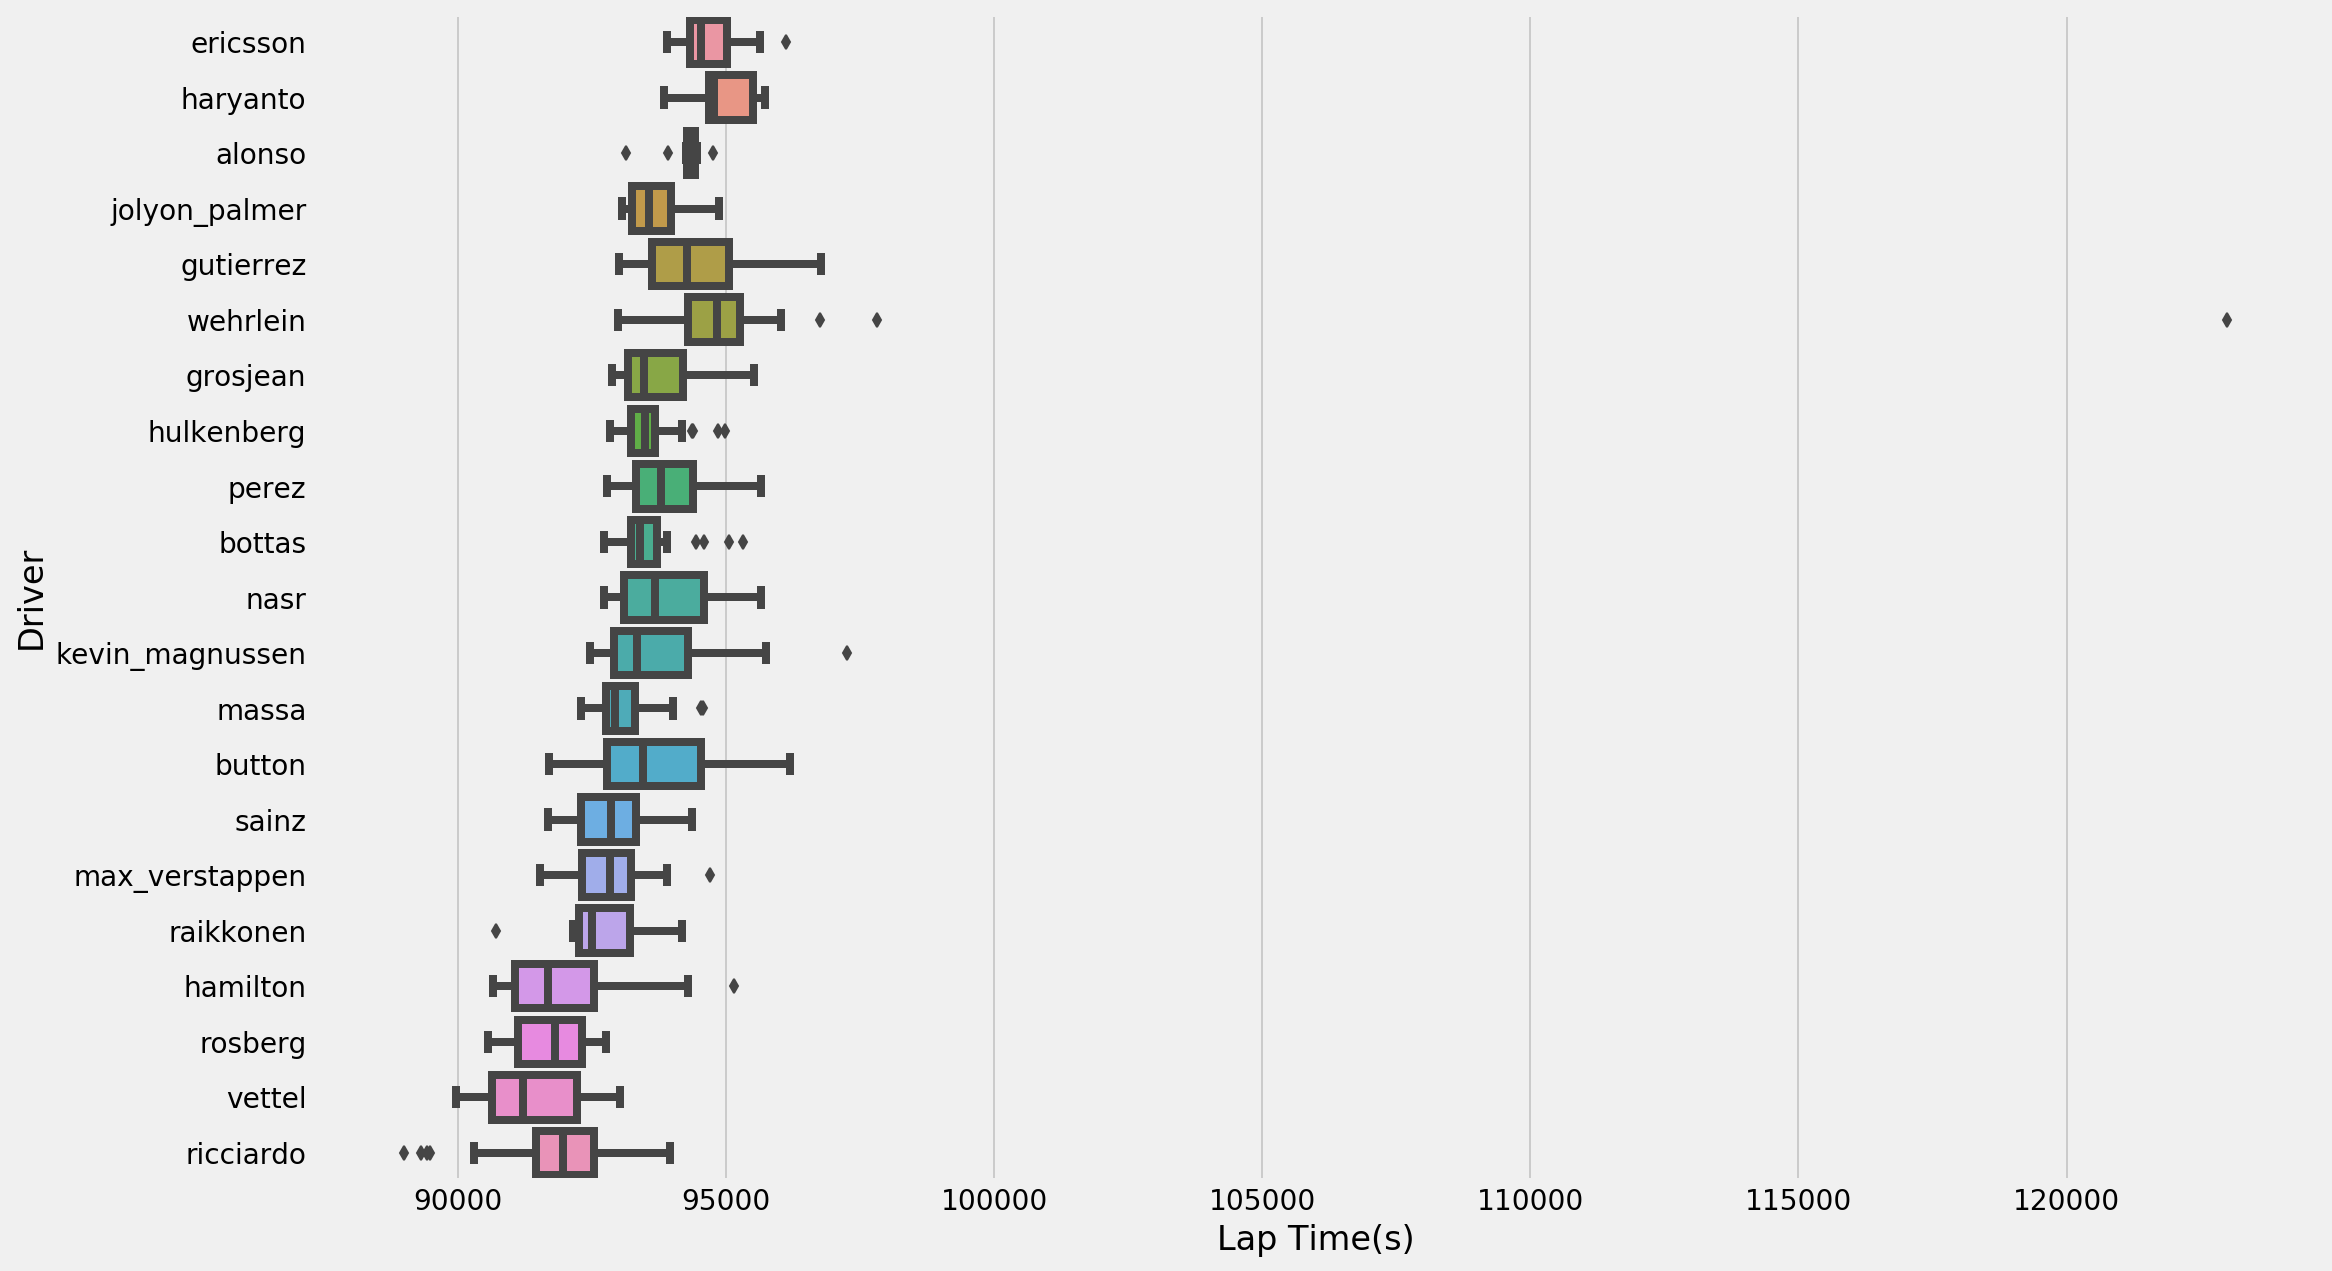

In [26]:
time_box_plot(AUS_2016, AUS_2016_pitlaps, filter_outliers_timediff)

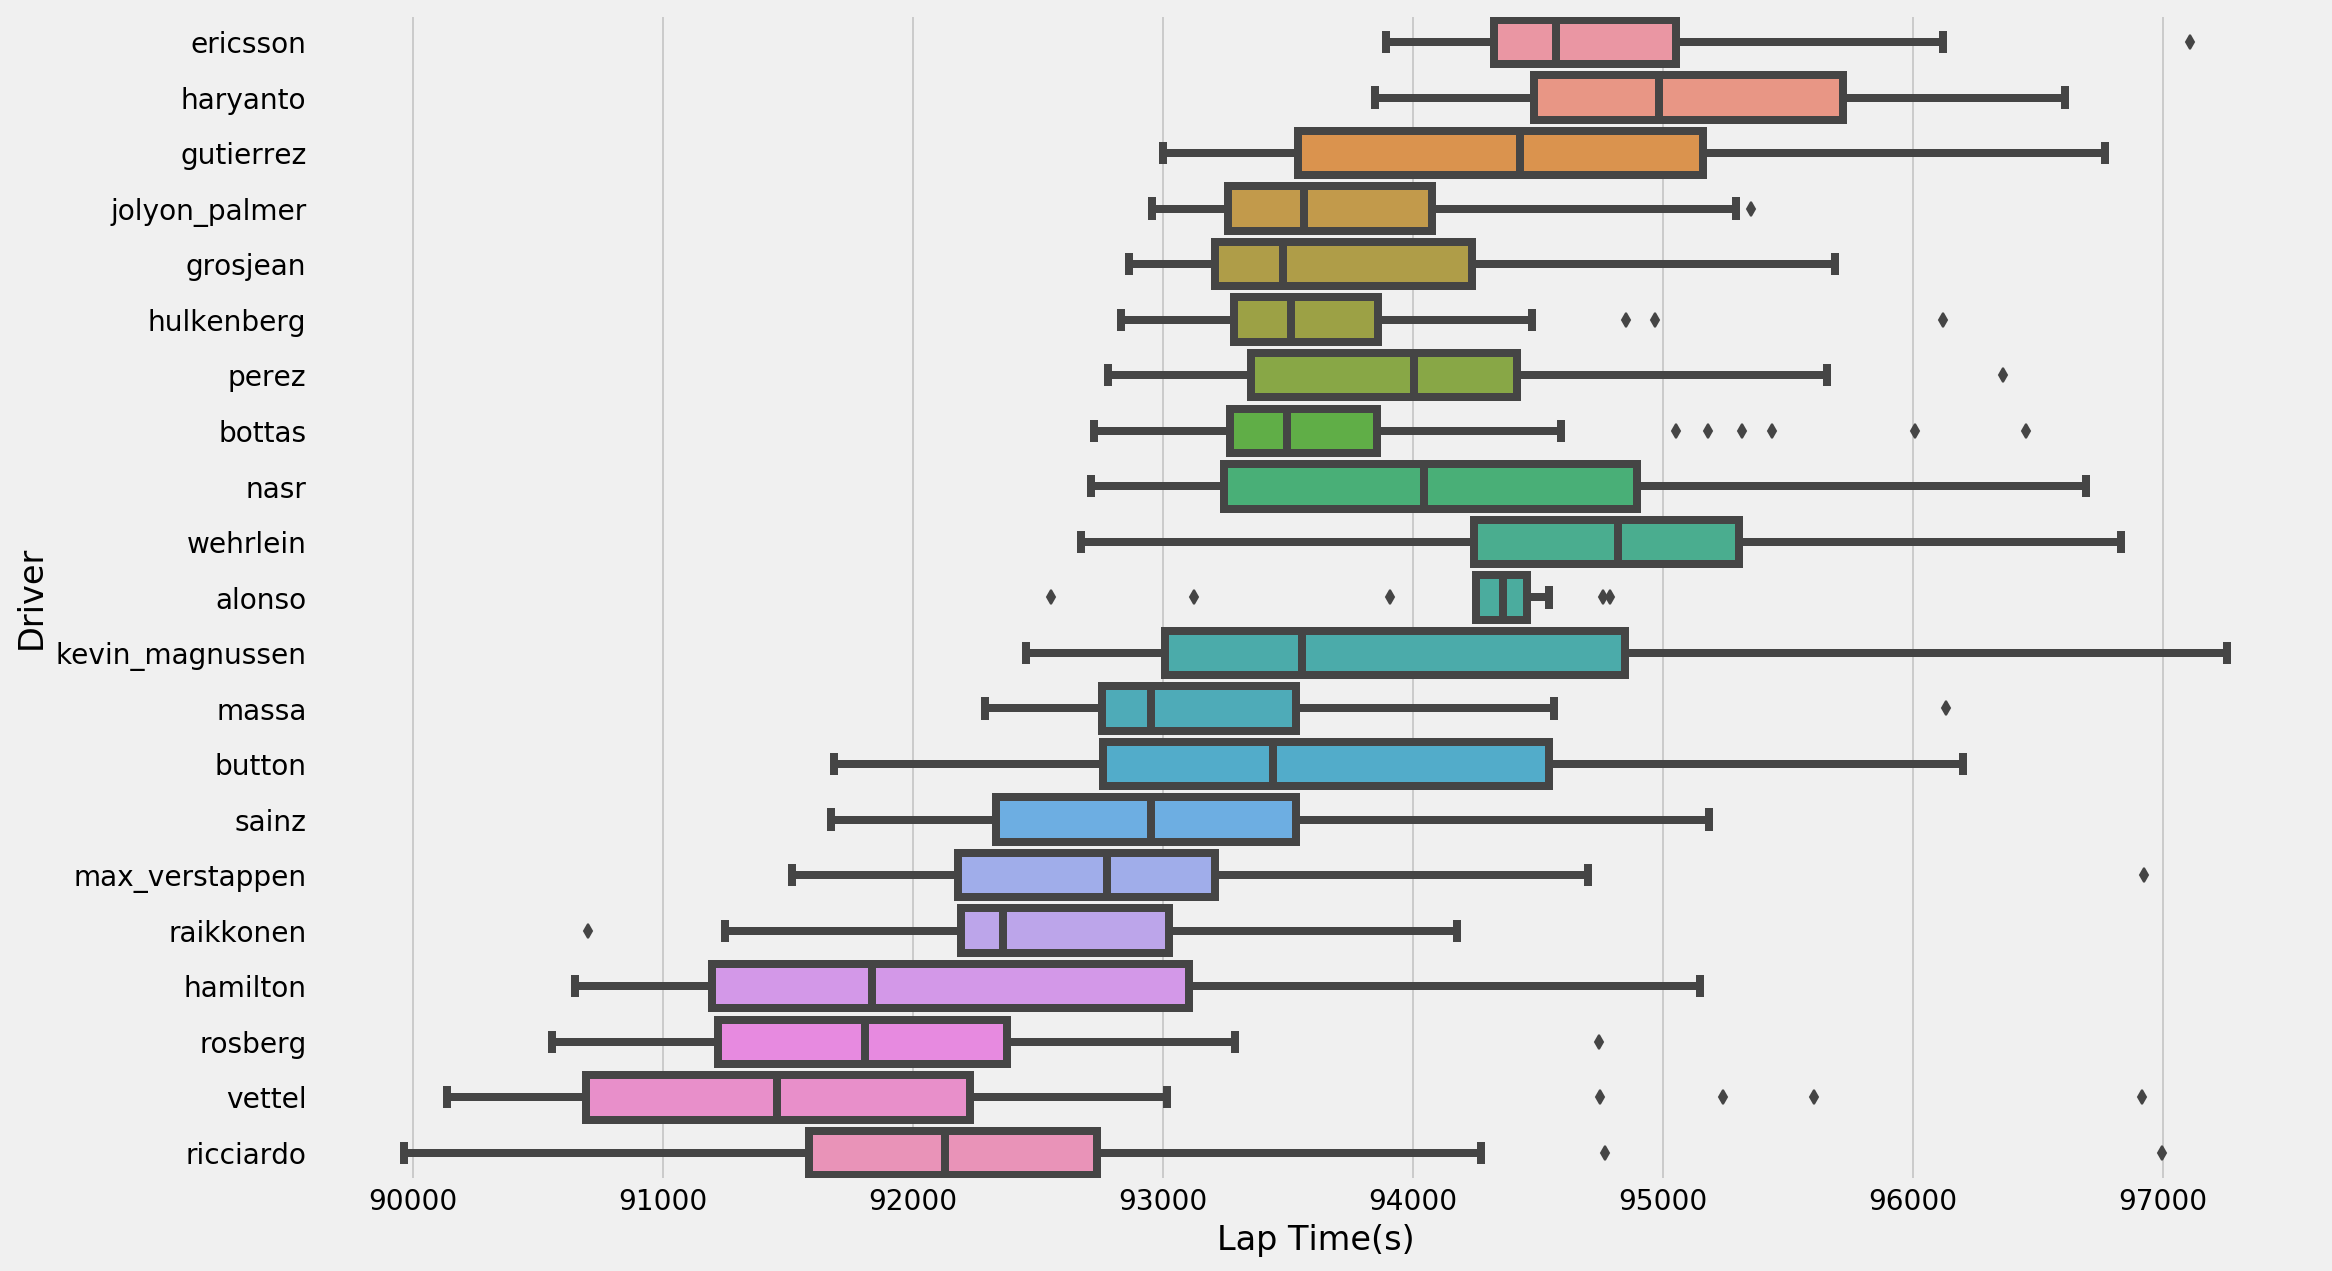

In [27]:
time_box_plot(AUS_2016, AUS_2016_pitlaps, filter_outliers_percentile)

#### LINEAR REGRESSION MODEL 

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import scipy.stats

In [35]:
def indiv_lin_reg(data, time_field, id_field):
    """Returns individual linear regression coefficients for each driver in each race"""
    
    coeffs = []
    intercepts = []
    driver_coeffs_intercepts = {}
    
    drivers = data['driverRef'].unique()
    for driver in drivers: 
        driver_df = data.groupby('driverRef').get_group(driver)
        x = driver_df[[time_field]]
        y = driver_df[[id_field]]
        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(x, y)
        coeffs.append(linreg.coef_)
        intercepts.append(linreg.intercept_)  
    driver_coeffs_intercepts = pd.DataFrame(
                                {'driver': drivers,
                                 'coeffs': coeffs,
                                 'intercept': intercepts
                                })

    return driver_coeffs_intercepts

In [37]:
indiv_lin_reg(clean_laps_no_outliers(AUS_2016, AUS_2016_pitlaps, filter_outliers_percentile), 'milliseconds', 'lap').sort_values(['coeffs'], ascending=[False])

,coeffs,driver,intercept
19,[[0.002167862876]],gutierrez,[-195.256816501]
13,[[0.00136371607659]],wehrlein,[-102.280186652]
1,[[-5.5298541961e-05]],raikkonen,[15.1190724333]
6,[[-0.000406599750263]],sainz,[68.7828219115]
3,[[-0.00145020009759]],max_verstappen,[164.917635317]
18,[[-0.00258542848762]],haryanto,[254.040606916]
9,[[-0.00325492821329]],alonso,[314.973621483]
4,[[-0.00354059710211]],massa,[360.831985356]
14,[[-0.00380071252798]],ericsson,[380.443596498]
0,[[-0.00468063979087]],vettel,[459.209686051]
